In [71]:
# -*- coding: utf-8 -*-
# """
# Created on Fri Jan 28 16:20:41 2022

# @author: DE
# """
# imports 
from time import sleep
import json
import pandas as pd
import io
import re
import numpy as np
from tqdm import tqdm
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm

from sklearn import preprocessing
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True) 

In [39]:
# CURRENCY = "bitcoin"
# CURRENCY_SYMBOL = "BTC"

# ## personal config
# TWEETS_FOLDER    = "data/crypto/%s"%(CURRENCY) # Relative path to historical data
# SEP_CHAR         = '~' # character seperating dates from and to in filename
# ENVS             = ['CRYPTO', 'LINE_COUNT', 'MOST_RECENT_FILE', 'MOST_RECENT_ID'] # Stored in var.csv
# MAX_ROW_PER_FILE = 20000 # Each file storing data has a maximum amount of rows

# tweets_raw_file = 'data/twitter/%s/%s_tweets_raw.csv'%(CURRENCY_SYMBOL,CURRENCY)
tweets_raw_file   = 'data/Bitcoin_tweets.csv'
tweets_clean_file = 'data/Bitcoin_tweets_clean.csv'
bit_price_file = 'data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv'
# query = '#%s OR #%s'%(CURRENCY,CURRENCY_SYMBOL) ####TODO PUT BACK  OR {CURRENCY} OR ${CURR

In [40]:
df_raw = pd.read_csv(tweets_raw_file,low_memory=False)
print(df_raw.shape)
df_raw.head(5)

(2259788, 13)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [91]:
df_price.Timestamp.max()

Timestamp('2021-03-31 00:00:00')

In [56]:
# clean df 
# d = pd.read_csv(tweets_raw_file)
df_raw = df_raw.sort_values(by = 'date')
dd = df_raw.sample(frac=0.01, replace=False, random_state=1)
dd.reset_index(inplace=True)
for i,s in enumerate(tqdm(dd['text'],position=0, leave=True)):
    text = str(dd.loc[i, 'text'])
    text = text.replace("#", "")
    text = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', text, flags=re.MULTILINE)
    text = re.sub('@\\w+ *', '', text, flags=re.MULTILINE)
    dd.loc[i, 'text'] = text
# f = open(tweets_clean_file, 'a+', encoding='utf-8')
dd.to_csv(tweets_clean_file, header=True, encoding='utf-8',index=False)

100%|███████████████████████████████████████████████████████████████████████████| 22598/22598 [00:27<00:00, 820.43it/s]


## Sentiment anatweets_clean_fileh Vader
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

VADER takes into account

negations and contractions (not good, wasn’t good)
Punctuation (good!!!), CAPS, emotes :), emojis
Intensificators (very, kind of), acronyms ‘lol’
Scores between -1.0 (negative) and 1.0 (positive)

We will use this sentiment analysis of the tweets to calculate a score that will represent the importance of each tweet.

In [57]:
df_clean = pd.read_csv(tweets_clean_file)
# df_clean = dd.copy()

In [60]:
analyzer = SentimentIntensityAnalyzer()
compound = []
for i,s in enumerate(tqdm(df_clean['text'],position=0, leave=True)):
    # print(i,s)
    vs = analyzer.polarity_scores(str(s))
    compound.append(vs["compound"])
df_clean["compound"] = compound
df_clean.head(2)

100%|██████████████████████████████████████████████████████████████████████████| 22598/22598 [00:02<00:00, 9048.16it/s]


,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,compound
0,195760,محمد,esfahan,‏‏‏خودت رو به خودت ثابت کن،نه به دیگران,2021-01-02 19:08:56,616.0,1683.0,1712.0,False,2021-06-22 05:22:52,nice project \n\n\n\n\n\nortcoin ort okratech ...,"['ortcoin', 'ort', 'okratech', 'bitcoin', 'air...",Twitter for Android,False,0.5994
1,1135874,Crypto Revolution Merchandise 💚,NaN,Crypto Revolution the Wave of change 👊😎👊 Not y...,2019-10-13 06:16:05,451.0,2045.0,45077.0,False,2021-08-25 07:06:40,Long Bitcoin short the banks 🧐,['Bitcoin'],Twitter Web App,False,0.0000


## Calculate a score for each tweet
To calculate the score for each tweet, we use different variables to which we had a weight based on its importance.

The compound column represents the sentiment of the tweets and its value is between -1 and 1.

We also use the number of retweets, the number of likes, and the number of users that follow the tweet's author.

In [72]:
scores = []
for i, s in tqdm(df_clean.iterrows(), total=df_clean.shape[0],position=0, leave=True):
    try:
        scores.append(s["compound"] * ((int(s["user_followers"]))) * ((int(s["user_favourites"])+1)/int(s['user_followers']+1)) *((int(s["is_retweet"])+1)))
    except:
        scores.append(np.nan)
df_clean["score"] = scores
df_clean.head(2)

100%|█████████████████████████████████████████████████████████████████████████| 22598/22598 [00:00<00:00, 23781.55it/s]


,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,compound,score
0,195760,محمد,esfahan,‏‏‏خودت رو به خودت ثابت کن،نه به دیگران,2021-01-02 19:08:56,616.0,1683.0,1712.0,False,2021-06-22 05:22:52,nice project \n\n\n\n\n\nortcoin ort okratech ...,"['ortcoin', 'ort', 'okratech', 'bitcoin', 'air...",Twitter for Android,False,0.5994,1025.108064
1,1135874,Crypto Revolution Merchandise 💚,NaN,Crypto Revolution the Wave of change 👊😎👊 Not y...,2019-10-13 06:16:05,451.0,2045.0,45077.0,False,2021-08-25 07:06:40,Long Bitcoin short the banks 🧐,['Bitcoin'],Twitter Web App,False,0.0000,0.000000


In [73]:
df_clean['score'].values

array([1025.10806353,    0.        ,  254.96011343, ...,    0.        ,
        300.47136   ,   20.88318057])

(array([1.000e+00, 1.000e+00, 5.000e+00, 1.600e+01, 9.300e+01, 2.212e+04,
        2.890e+02, 5.200e+01, 9.000e+00, 9.000e+00]),
 array([-27.0476538 , -22.14891035, -17.2501669 , -12.35142346,
         -7.45268001,  -2.55393657,   2.34480688,   7.24355032,
         12.14229377,  17.04103721,  21.93978066]),
 <BarContainer object of 10 artists>)

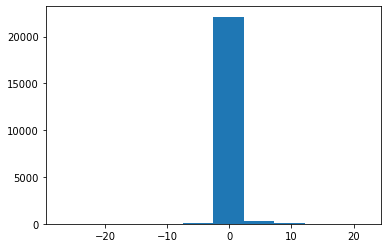

In [74]:
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(df_clean['score'].values.reshape(-1,1))
plt.hist(x_scaled,bins=10)

## read Bitcoin price

In [75]:
df_price = pd.read_csv(bit_price_file)
df_price.Timestamp = pd.to_datetime(df_price.Timestamp,unit='s')
df_price.head(2)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# sentiment analysis 
df_clean = df_clean.drop_duplicates()
tweets = df_clean.copy()
tweets['date'] = pd.to_datetime(tweets['date'],utc=True)
tweets.date = tweets.date.dt.tz_localize(None)
tweets.index = tweets['date']

# tweets_grouped = tweets.groupby(pd.TimeGrouper('1h'))['score'].sum()
tweets_grouped = tweets.resample('1h').sum()

crypto_usd = df_price.copy()
crypto_usd['Timestamp'] = pd.to_datetime(crypto_usd['Timestamp'], unit='s')
crypto_usd.index = crypto_usd['Timestamp']

# crypto_usd_grouped = crypto_usd.groupby(pd.TimeGrouper('1h'))['Weighted_Price'].mean()
crypto_usd_grouped = crypto_usd.resample('1h')['Weighted_Price'].mean()

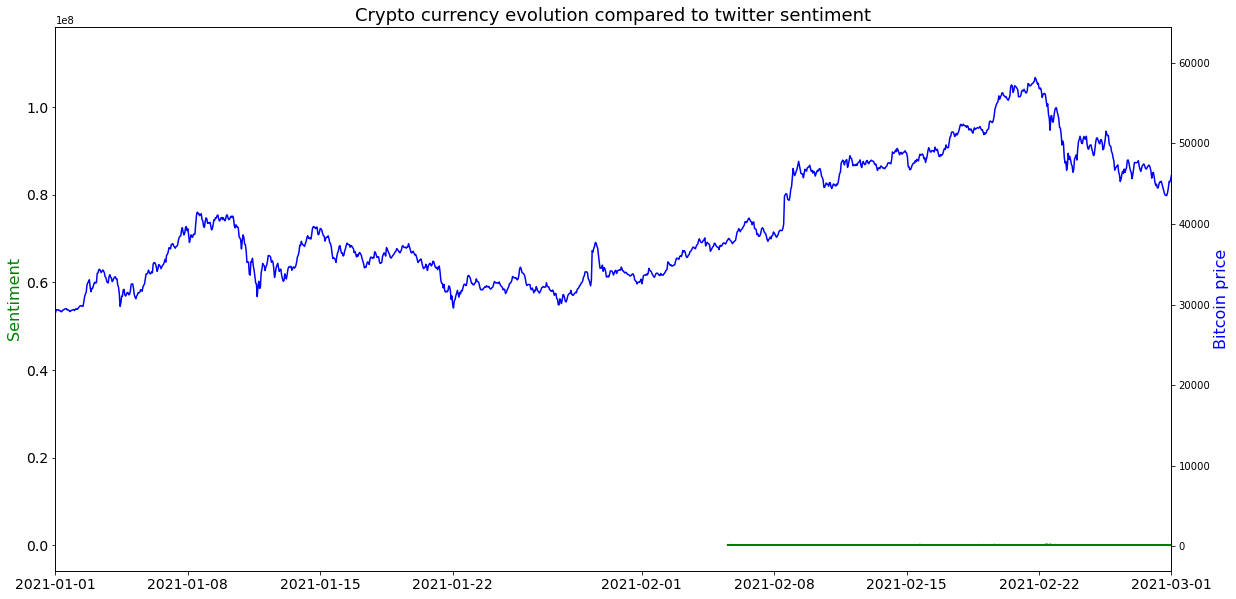

In [94]:
date1, date2 = pd.to_datetime('2021-01-01'),pd.to_datetime('2021-03-01')
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Crypto currency evolution compared to twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax1.axis(xmin = date1,xmax = date2)

ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'g-')
ax2.plot_date(crypto_usd_grouped.index, crypto_usd_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin price", color='b', fontsize=16)
plt.show()

In [ ]:
# from plotly.offline import init_notebook_mode, iplot
# import plotly.graph_objs as go
# def candelplot(df):
#     trace = go.Candlestick(x=df.Timestamp,
#                            open=df.Open,
#                            high=df.High,
#                            low=df.Low,
#                            close=df.Close)
#     data = [trace]
#     layout = {
#         'title': f"Bitcoin currency",
#         'yaxis': {'title': 'Price USD'},
#     }
#     fig = dict(data=data, layout=layout)
#     iplot(fig)
# candelplot(df_price)